# Assignment 2

# Pouyan Salehi

## Exercise 1: Gray level transformation

Apply the following gray level transformations to an image

### Explanation
In this section all the necessary libraries are imported<br>
**io:** in order to read an image (it is an input/output library, generally)<br>
**data:** to convert the image into a np.array element.<br>
**color:** to call **rgb2gray** function which makes us able to convert the image to grayscale.<br>
The *Scikit-image* library has is imported with alias *ski* only to satisfy the need of calling the library for other fewer use functions (<a href="#e.g">e.g. line 26</a>) and the reason for calling *io* is the same.<br>
<span id="firstLine"></span>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data
from skimage import io
import skimage.color as color

### Explanation
The **imshow** is used to show the original image and with **skimage.color** (alias: color) the image is converted to a grayscale image. Moreover, the **cmap=plt.cm.gray** is used to map the image in gray colors, because the default color for cmap is green.

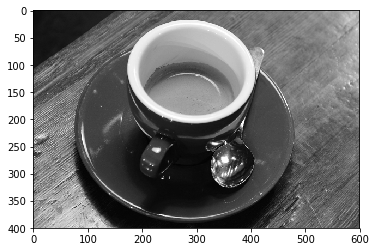

In [29]:
img = data.coffee()
plt.imshow(img)
imggr = color.rgb2gray(img)
plt.imshow(imggr,cmap=plt.cm.gray)

(a) Negative transformation

### Explanation:
In this section, the invert function from ***util*** library of ***scikit-image*** make us able to do negative transformation.

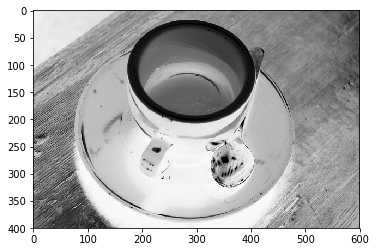

In [30]:
from skimage import util
imginvert = util.invert(imggr)
plt.imshow(imginvert, cmap = plt.cm.gray)

(b) Logarithmic transformation

### Explanation:
For applying the function of the mentioned filters we should call submodule **exposure** form scikit-image.<br>
Then used **adjust_log()** function to do Logarithmic transformation and chose number 2.5 for the constant multiplier in function $Clog(1+I)$<br>
Complete details of **adjust_log()** are available in <a href="https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.adjust_log">  API Documentation</a> of scikit-image.


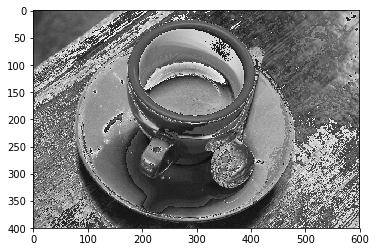

In [31]:
from skimage import exposure
imglog = exposure.adjust_log(img, 2.5)
imggr = color.rgb2gray(imglog)
plt.imshow(imggr, cmap = plt.cm.gray)

(c) Contrast stretching
The algorithmic steps for making *Contrast stretching* filter is exactly the same as steps for *Logarithmic trasforamtion*.<br>
Complete details of **exposure.rescale_intensity** are available in <a href="https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity"> API Documentation</a> of scikit-image.

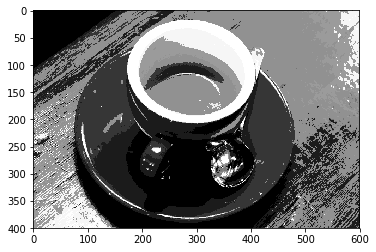

In [32]:
imgconstr = exposure.rescale_intensity(img, in_range=(img.min(),80*img.max()))
imggr = color.rgb2gray(imgconstr)
plt.imshow(imggr, cmap = plt.cm.gray)

## Exercise 2: Gamma Correction & Histogram Equalization

<p id="e.g">Select an image, convert it to a floating point gray scale image, and apply the following steps.</p>

### Explanation
There are about 7 Types of image conversion available in scikit-images which are described below:<br>
**img_as_float**<br>
Convert an image to floating point format, with values in [0, 1]. Is similar to img_as_float64, but will not convert lower-precision floating point arrays to float64.<br>
**img_as_float32**<br>
Convert an image to single-precision (32-bit) floating point format, with values in [0, 1].<br>
**img_as_float64**<br>
Convert an image to double-precision (64-bit) floating point format, with values in [0, 1].<br>
**img_as_uint**<br>
Convert an image to unsigned integer format, with values in [0, 65535].<br>
**img_as_int**<br>
Convert an image to signed integer format, with values in [-32768, 32767].<br>
**img_as_ubyte**<br>
Convert an image to unsigned byte format, with values in [0, 255].<br>
**img_as_bool**<br>
Convert an image to boolean format, with values either True or False.<br>
<br>
The **ski** has defined in <a href="#firstLine">In [21]</a> as an alias to call *skimage*. The "Camera" picture is selected for this exercise and I used *img_as_float()* because of its dynamism in conversion.

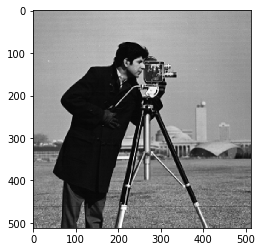

In [33]:
img = ski.img_as_float(data.camera())
plt.imshow(img)
import skimage.color as color
imggr = color.rgb2gray(img)
plt.imshow(imggr,cmap=plt.cm.gray)

(a) Create a histogram of the image

### Explanation:
The way that we can display a histogram with skimage was described in class, completely.<a href="#classDisplay">In [82]</a><br>
However, the method here is slightly different, which is described below:<br>
In this code, the **plt.hist()** is used which is one of the *matplot* libraries. In addition, there are some attributes which have been defined in function for editing the shape and view of histogram.<br>
More importantly, The **ravel**  used to convert the image array to 1D array in order to plot that and **bins** defines the number of bars for our histogram.<br>
Moreover, I used plt.legend to show the histogram label at the top and hide the array result when the code is run.

#### My version:

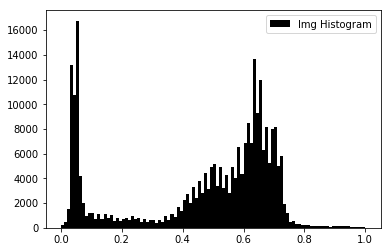

In [34]:
plt.hist(imggr.ravel(), bins=100, histtype='stepfilled', color='black', label = 'Img Histogram')
plt.legend() #to hide the array

#### Class Version <span id="classDisplay"></span>

In [35]:
from skimage import exposure
pfd, bins = exposure.histogram(imggr, nbins=20)


(b) Calculate and display cumulative distribution function

### Explanation: (Solved in class)
With use of exposure module and call of **cumulative_distribution(*imgaddr*, *bins*)** we can sotre the data of cdf and prepare them for plotting.<br>
**bins:** shows sthe amount of bars. In other words, it can define the accuracy of your plot.
**cdf:** is a variable to save the CDF data.

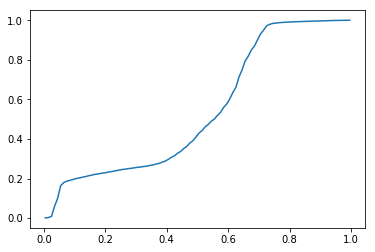

In [36]:
cdf, bins = exposure.cumulative_distribution(imggr,100)
plt.plot(bins, cdf)

(c) Perform histogram equalization and compare it with the original histogram.

### Explanation:
I used the methode same as 2.a

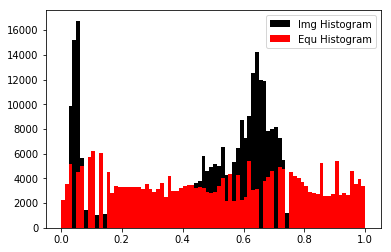

In [37]:
imgeq = exposure.equalize_hist(img)
plt.hist(imggr.ravel(), bins=80, histtype='stepfilled', color='black', label = 'Img Histogram')
plt.hist(imgeq.ravel(), bins=80, histtype='stepfilled', color='red', label = 'Equ Histogram')
plt.legend() #to hide the array

(d) Apply a gamma correction with $\gamma = 0.5$ and $\gamma = 2$.

### Explanation:
All the methods form this section are available in scikit-imgae library.

Text(0.5, 1.0, 'gamma 2')

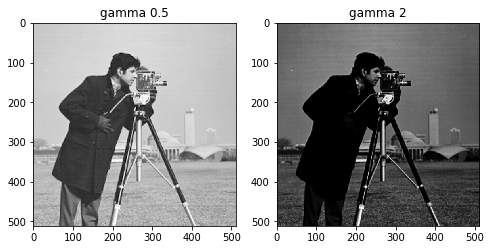

In [38]:
gamma_corrected1 = exposure.adjust_gamma(imggr, 0.5)
gamma_corrected2 = exposure.adjust_gamma(imggr,2)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[0].set_title("gamma 0.5")
ax[1].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[1].set_title("gamma 2")

## Exercise 3: Image enhancement with logical operators

The fits-file $test\_data\_aia.fits$ contains a time-series of images of an active region on the SUn on 2016 September 6. The observations are from the Solar Dynamics Observatory and show the corona.

(a) Read-in the fits-file with programs of the $astropy$ libary.

### Explanation:
Most of the steps are exactly the same as methods described in astropy website.<br>
http://docs.astropy.org/en/stable/io/fits/<br>
There are 15 images in the mentioned fits file. No.1 and No.14 images were selected because the difference in them is much higher.

Filename: test_data_aia.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (700, 700)   int16   
  1                1 ImageHDU         7   (700, 700)   int16   
  2                1 ImageHDU         7   (700, 700)   int16   
  3                1 ImageHDU         7   (700, 700)   int16   
  4                1 ImageHDU         7   (700, 700)   int16   
  5                1 ImageHDU         7   (700, 700)   int16   
  6                1 ImageHDU         7   (700, 700)   int16   
  7                1 ImageHDU         7   (700, 700)   int16   
  8                1 ImageHDU         7   (700, 700)   int16   
  9                1 ImageHDU         7   (700, 700)   int16   
 10                1 ImageHDU         7   (700, 700)   int16   
 11                1 ImageHDU         7   (700, 700)   int16   
 12                1 ImageHDU         7   (700, 700)   int16   
 13                1 ImageHDU         7   (700, 700)   int16   
 14           

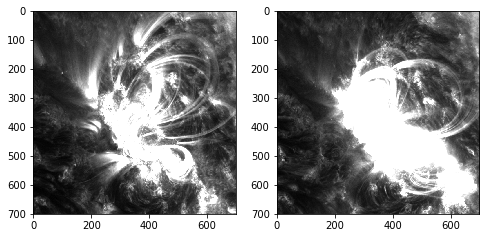

In [39]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
imgfits = fits.open('test_data_aia.fts')
imgfits.info()
pic1 = imgfits[1].data
pic2 = imgfits[14].data
pic1gr = color.rgb2gray(pic1)
pic2gr = color.rgb2gray(pic2)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(pic1gr, vmin = pic1gr.min(), vmax =600, cmap=plt.cm.gray)
ax[1].imshow(pic2gr, vmin = pic1gr.min(), vmax =600, cmap=plt.cm.gray)

(b) Subtract two images from each other. What can you see?

### Explanation (b&c):
Here, *picsub* stores the subtraction of two $np.arrays$ *pic1* and *pic2*. In order to do the subtraction, the methods which were demonstrated and investigated fully in exercise 01 are used.<br>
Furthermore, the codes which are used in **part (c)** exactly have the same pattern as **part (b)**.<br>
Finally, the result has been shown in a from a table with 1 row and 3 column with use of **plt.subplots()** and *vmin* and *vmax* were defined by functions *.min()* and *.max()* to rescale the picture base on its non-zero values. 

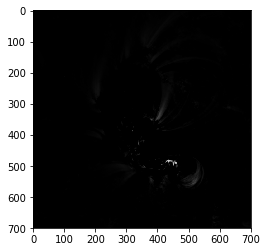

In [40]:
picsub = pic1 - pic2
plt.imshow (picsub,vmin = pic1gr.min(), vmax =pic1gr.max(), cmap=plt.cm.gray)

(c) Try out other arithmetic operators on the images.

Text(0.5, 1.0, 'Multiplication')

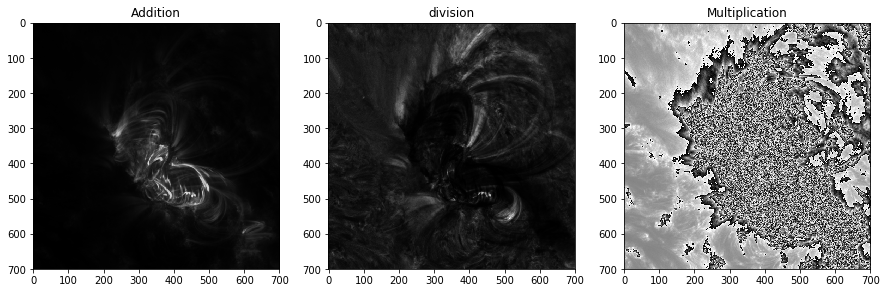

In [41]:
picplus = pic1gr + pic2gr
picdiv  = pic1gr / pic2gr
picmult = pic1gr * pic2gr
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()
ax[0].imshow(picplus, vmin = picplus.min(), vmax =picplus.max(), cmap=plt.cm.gray)
ax[0].set_title('Addition')
ax[1].imshow(picdiv, vmin = picdiv.min(), vmax =picdiv.max(), cmap=plt.cm.gray)
ax[1].set_title('division')
ax[2].imshow(picmult, vmin = picmult.min(), vmax =picmult.max(), cmap=plt.cm.gray)
ax[2].set_title('Multiplication')

(d) What happens, when you produce the average image of all 14 images?

### Explanation:
For applying an average of all 14 images we have to make a for-loop to add all the values of 14 images together and devide thime by the number of elements in array. On top of that, we need to subtract *PRIMARY* image with the index of 0 from all the images because it is the result of test. Therefore, the code for $avg$ should be modified like: <br> <font face="Courier New">avg = (sum - imgfits[0].data)/(len(imgfits) -1)</font>

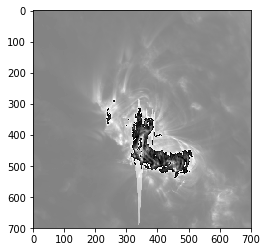

In [42]:
sum = 0
counter = 0
for i in imgfits:
    sum = sum + i.data
avg = (sum - imgfits[0].data)/(len(imgfits) -1)
plt.imshow (avg, vmin = avg.min(), vmax = avg.max(), cmap=plt.cm.gray)

## Exercise 4: Spatial Filtering - Laplacian kernel

Use the following two implementations of the Laplacian kernal to filter an image. Subtract the resultant image from the original image. Which image is sharply enhanced?

$$
w_1 = 
\left[
\begin{array}{ccc}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{array}
\right]
$$ 
and 
$$
w_2 = 
\left[
\begin{array}{ccc}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{array}
\right]
$$

### Explanation:
This section is solved by **.convolve()** method from **ndimage** module from **scipy** library. This method can accept a $np.array()$ as a filter an apply it on another matrix (which is our image) to do the convolution. Since our filters are 2x2, converting  the pictures to grayscale is something mandatory. Moreover, more detail about **convolve** function is available in <a href="https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.ndimage.filters.convolve.html">scipy documentation</a><br>
Finally, base on results from the mentioned function ***w1*** makes the image sharper.

In [43]:
from scipy import ndimage
image = data.logo()
imggr = color.rgb2gray(image)

Text(0.5, 1.0, 'filter w2')

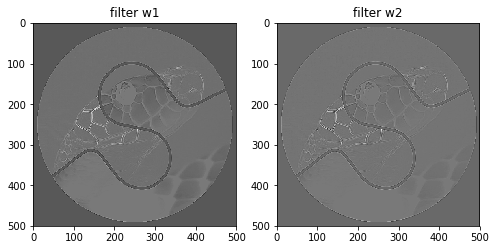

In [44]:
w1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
w2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
con1 = ndimage.convolve(imggr,w1)
con2 = ndimage.convolve(imggr,w2)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(con1-imggr , cmap=plt.cm.gray)
ax[0].set_title("filter w1")
ax[1].imshow(con2-imggr, cmap=plt.cm.gray)
ax[1].set_title("filter w2")

## Exercise 5: Spatial Filtering - diverse kernel

In [45]:
from skimage import filters
image = ski.img_as_float(data.astronaut())
imggr = color.rgb2gray(image)

(a) Filter an image using the following filters (1) median, (2) Laplacian, and (3) Sobel created with the $\textit{scikit-image}$ Module $\textit{filters}$

Text(0.5, 1.0, 'sobel')

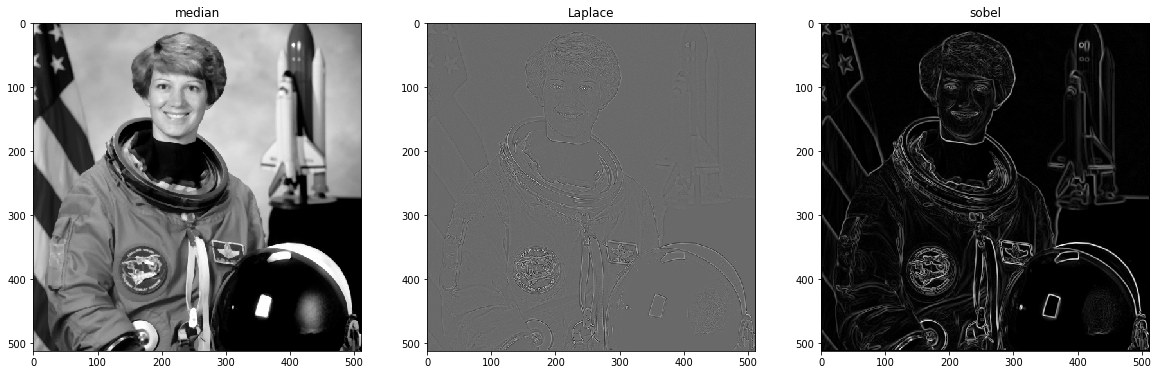

In [46]:
med = filters.median (imggr)
lap = filters.laplace(imggr)
sob = filters.sobel  (imggr)
fig, axes = plt.subplots(1, 3, figsize=(20,50))
ax = axes.ravel()
ax[0].imshow(med, cmap=plt.cm.gray)
ax[0].set_title("median")
ax[1].imshow(lap, cmap=plt.cm.gray)
ax[1].set_title("Laplace")
ax[2].imshow(sob, cmap=plt.cm.gray)
ax[2].set_title("sobel")

(c) Subtract the image filtered with the Laplacian kernel from the original iamge.

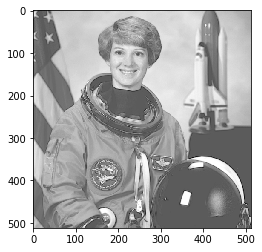

In [47]:
new = imggr - sob
plt.imshow(new, cmap=plt.cm.gray)

(d) Multiply the image filtered with the Sobel kernel from (a) and the resultant image from (c).

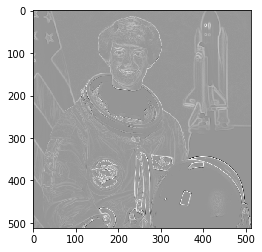

In [48]:
new = sob * new
plt.imshow(new, cmap=plt.cm.gray)

(e) Subtract the resultant image from (d) from the original iamge and apply $\gamma$-correction (Tip: no zero values in image).

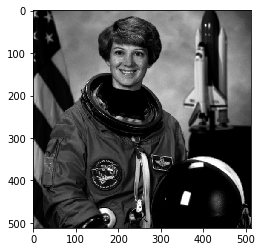

In [49]:
new = imggr - new
gamma = exposure.adjust_gamma(new,2)
plt.imshow(gamma, cmap=plt.cm.gray)

(f) Take an image with many edges and try with an appropriate filter to enhance: (1) horizonatl, (2) vertical, and (3) diagonal lines.

### Explanation:
The coin image is chosen deliberately. The round edges of coins make the visibility of horizontal and vertical and even the diagonal filters better. <br>
The white and black edges of coins represent the negative and positive signs of Sobel masks. Moreover, Roberts filter is used here as a diagonal filter (base on the shpe of its matrix). <br>

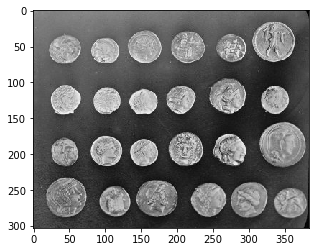

In [50]:
image = data.coins()
imggr = color.rgb2gray(image)
plt.imshow (image , cmap = plt.cm.gray)

Text(0.5, 1.0, 'roberts')

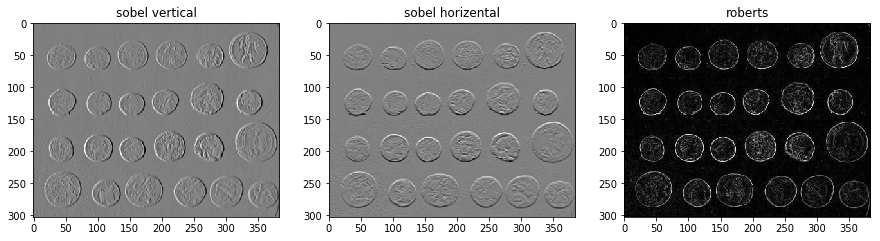

In [51]:
sobver = filters.sobel_v(image)
sobhor = filters.sobel_h(image)
roberts = filters.roberts(image)
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
ax = axes.ravel()
ax[0].imshow(sobver , cmap=plt.cm.gray)
ax[0].set_title("sobel vertical")
ax[1].imshow(sobhor, cmap=plt.cm.gray)
ax[1].set_title("sobel horizental")
ax[2].imshow(roberts, cmap=plt.cm.gray)
ax[2].set_title("roberts")